In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl (376.9 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense
from keras import regularizers
from keras.models import Sequential

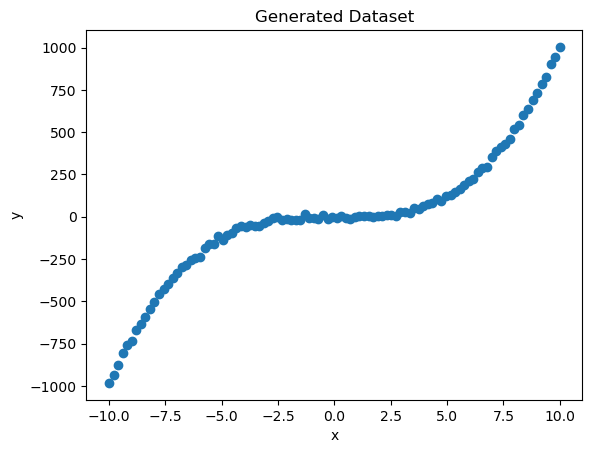

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

x = np.linspace(-10,10,100)
y = x**3 + np.random.normal(0,10,100)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Dataset')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x.reshape(-1,1))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [15]:
model = Sequential([
    Dense(100, input_shape=(1,), activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(1)

])

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(x_train,y_train,epochs=500,batch_size=32,verbose=0)

training_loss = model.evaluate(x_train,y_train)
testing_loss = model.evaluate(x_test,y_test)
print('Training Loss: ',training_loss)
print('Testing Loss: ',testing_loss)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 170.1343  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 203.7220
Training Loss:  170.7345733642578
Testing Loss:  203.7219696044922


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


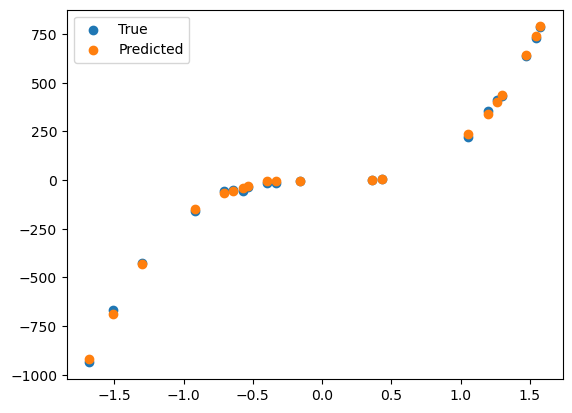

In [17]:
y_pred = model.predict(x_test)
plt.scatter(x_test,y_test,label='True')
plt.scatter(x_test,y_pred,label='Predicted')
plt.legend()
plt.show()